<b> Final Project I590 Part II - Danny Rigdon, Harshal Pandit, Siddarth Gokhale </b>



In [39]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from statistics import stdev  #Imported this function but ended up using .std instead

In [2]:
#load data file
bcw = pd.read_csv('Breast-Cancer-Wisconsin.csv')

In [3]:
#print some of the datafile out to ensure it loaded and see if it looks appropriate
bcw.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
#Replace ? by NaN in column A7. 
bcw['A7'] = bcw['A7'].replace('?', np.NaN)

In [5]:
#column needs to be converted back to numeric. 
bcw['A7'] = pd.to_numeric(bcw['A7'], errors='coerce')

In [6]:
#Report how many NaN. Use isnull() function applied to the dataframe. 
bcw.isnull()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Then you can use arithmetic sum(). 
#[Remember to use print() statement to report]
print(bcw['A7'].isnull().sum())

16


In [8]:
#Replace NaN values with the mean of column A7. Use fillna() - find how to calculate mean of the column, 
#add a parameter skipna=TRUE. Apply this function to the entire df - you do not need to specify here column A7

#add column wise fill na prior to applying the mean


#update to just include A2 - CLASS with square brackets*

bcw_clean = bcw[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']].mean(skipna=True)

In [9]:
bcw_clean = bcw[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']].fillna(bcw.mean(skipna=True, numeric_only=True))


In [10]:
#summary statistics 
bcw_clean[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']].describe()


,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
#Find number of columns and number of rows
bcw.shape

(699, 11)

In [12]:
#Report how many unique id values (column Scn) - hint the length of unique ids

len(bcw['Scn'].unique())


645

In [13]:
#print out column titles to see where to subset
bcw.columns

Index(['Scn', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS'], dtype='object')

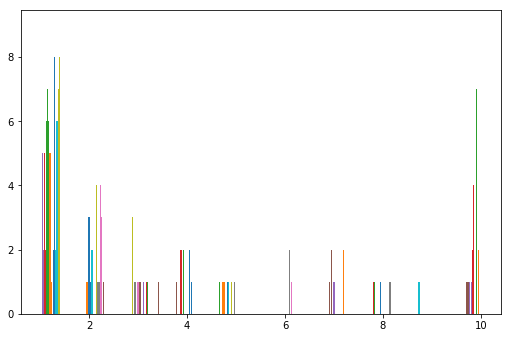

In [25]:
#Draw histograms for columns A2-A10
bcw_subset = bcw_clean[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]
plt.hist(bcw_subset, bins=20)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

/Users/djrigdon/miniconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/djrigdon/miniconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


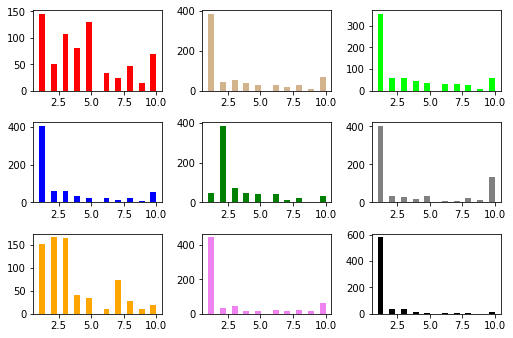

In [26]:
#Draw histograms for columns A2-A10 - histograms as subplots
fig, axes = plt.subplots(nrows=3, ncols=3)
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()

ax0.hist(bcw['A2'], histtype='bar', color='red', bins=20)

ax1.hist(bcw['A3'], histtype='bar',color='tan', bins=20)

ax2.hist(bcw['A4'], histtype='bar',color='lime',bins=20)

ax3.hist(bcw['A5'], histtype='bar',color='blue',bins=20)

ax4.hist(bcw['A6'], histtype='bar',color='green',bins=20)

ax5.hist(bcw['A7'], histtype='bar',color='gray',bins=20)

ax6.hist(bcw['A8'], histtype='bar',color='orange',bins=20)

ax7.hist(bcw['A9'], histtype='bar',color='violet',bins=20)

ax8.hist(bcw['A10'], histtype='bar',color='black',bins=20)

fig.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

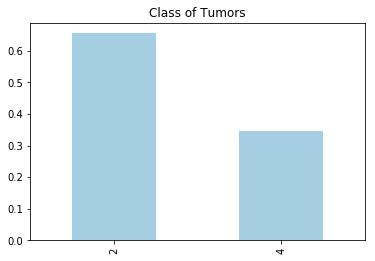

In [27]:
#Draw a bar plot for CLASS - you can use groupby to see counts of benign and malignant values or you can count 
#values directly using pd.value_counts() function and apply it to plot.bar() function.
bcw['CLASS'].value_counts('CLASS').plot(kind = "bar", title="Class of Tumors", colormap='Paired')

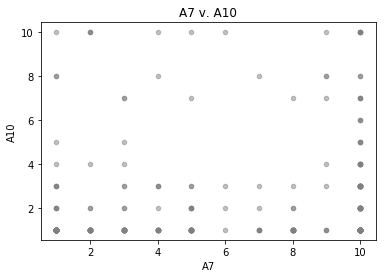

In [17]:
#Draw a scatterplot of any two columns. 
bcw.plot.scatter(x='A7',y='A10', c='gray', alpha = 0.5, title="A7 v. A10")

#Summarize by reporting which values might need standardization in the future (too much variation) and any other observations that you may discover as a Data Scientist.

We found a number of areas that may benefit from additional standardization in the future. The strongest case was A10 - where 99% of benign tumors rated between 1 and 2, and 79% of malignant tumors rated 1-3. This overlap would make it difficult to find any correlation in the data, and indicates that additional guidelines on rating may allow better analysis.  

Some additional observations include: Column A2 seems distributed from range 1-4 at 77% for benign and for malignant 87% is between 5-10.  A3 is similar with 83% of benign tumors at a 1 rating, and 71% of the malignant at 5-10.  Columns A5 and A6 have the largest distribution of scores from 1-10 and may benenfit from more standardization.    

Observations that may be discovered as a Data Scientist:

Point 1:
    Malignancy is generally distributed as a whole
    Mitoses tumors are concentrated between values 1-3
    Individual splits in the image

Point 2:
    We should be able to find two clusters based on the columns as features
    
    

# Part II

# Use KMeans algorithm

In [28]:
model = KMeans(n_clusters=4)
model.fit(bcw_subset)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
labels = model.predict(bcw_subset)

In [31]:
print(labels)

[0 3 0 2 0 1 0 0 0 0 0 0 0 0 1 2 0 0 3 0 3 2 0 2 0 3 0 0 0 0 0 0 2 0 0 0 2
 0 3 3 2 2 1 2 2 0 3 0 0 2 2 0 2 1 3 2 2 2 3 2 2 0 2 2 0 2 0 3 1 0 0 2 0 3
 2 0 0 0 0 0 0 0 0 0 1 2 3 1 0 0 0 0 0 0 0 0 0 0 2 1 2 0 0 0 1 0 3 1 0 3 0
 3 3 1 0 0 0 1 0 0 0 0 1 3 1 0 3 0 3 0 0 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0
 0 1 0 3 2 0 0 3 0 0 0 1 3 0 0 0 0 0 1 2 0 0 0 0 0 1 3 1 0 2 0 3 0 0 0 1 3
 0 1 1 1 0 1 1 0 0 0 0 3 0 0 0 1 3 0 0 0 1 2 0 0 0 1 1 0 1 1 2 0 0 2 0 0 1
 0 3 3 0 3 2 0 1 3 1 2 3 0 0 1 2 1 3 0 0 0 0 0 0 1 3 0 0 0 3 3 1 2 3 0 0 0
 3 3 1 1 3 2 0 3 3 2 0 3 0 3 0 0 0 0 0 0 3 0 0 3 3 3 1 1 0 2 1 0 0 2 3 0 3
 2 0 0 3 2 0 1 0 3 3 0 0 2 0 0 0 2 0 0 2 3 1 0 3 3 0 0 3 0 0 3 0 2 3 3 0 0
 3 3 0 3 0 0 3 3 0 0 0 1 0 0 0 2 3 0 0 2 1 0 0 0 1 2 3 1 3 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 2 0 3 0 3 0 0 0 0 1 0 0 0 1 0 2 0 0 0 0 0 0 3 3 2 0 0 0 3 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 3 2 0 0 0 0 0 0 0 2 3 3 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 2 0 0 3 0 

In [32]:
centroids = model.cluster_centers_
print(centroids)

[[2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.3514006
  2.06167401 1.20044053 1.07709251]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.45322005
  5.38028169 6.81690141 2.30985915]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]]


# Find optimal number of clusters

In [33]:
# make a range
ks = range(1, 15)

#create an empty list for inertias values
inertias = [] 

# do a for loop
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(bcw_subset)    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

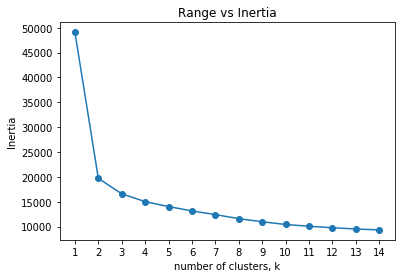

In [34]:
# Plot Range vs Inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

In [110]:
#specify the optimal number of clusters based on the inertia plot

### Based on the plot, we should choose the number where there is an obvious "elbow" for the optimal number of clusters.  In this plot 2 would be the optimal number of clusters.

# Revise data variation

In [54]:
#apply standard deviation function for columns A2-A10
bcw_subset.std(axis=0)

A2     2.815741
A3     3.051459
A4     2.971913
A5     2.855379
A6     2.214300
A7     3.601852
A8     2.438364
A9     3.053634
A10    1.715078
dtype: float64

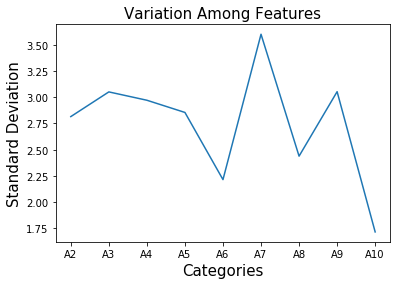

In [113]:
#plot standard deviation values - select a graphic that could display all nine values [do not use histogram],
#add title, legend, ylabel, xlabel.

x = [0,1,2,3,4,5,6,7,8]
Labels = ['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
y = bcw_subset.std(axis=0)
index = np.arange(len(Labels))
plt.plot(x, y)
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Standard Deviation', fontsize=15)
plt.xticks(index, Labels, fontsize=10)
plt.title('Variation Among Features', fontsize=15)
plt.show()

#describe which features have a lot of data variation

### Features A7 and A9 have the most variation

# Implement normalization

In [37]:
scaler = StandardScaler()
# Create KMeans instance: kmeans
#use the n_cluster based on the optimal number you have identified from Inertia
model = KMeans(n_clusters=2) 
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,model)
pipeline.fit(bcw_subset)
labels = pipeline.predict(bcw_subset)
print(labels)

[1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0
 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1
 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 1 1 1 0 0 1 1 0 1 

/Users/djrigdon/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/djrigdon/miniconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/djrigdon/miniconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [38]:
#find centroids and print them
centroids = model.cluster_centers_
print(centroids)

[[ 0.97149511  1.18638768  1.18084142  1.01306401  1.01321674  1.14116201
   1.07224455  1.0336256   0.59505198]
 [-0.50155279 -0.61249516 -0.60963179 -0.52301352 -0.52309237 -0.58914655
  -0.5535666  -0.53362883 -0.30720688]]


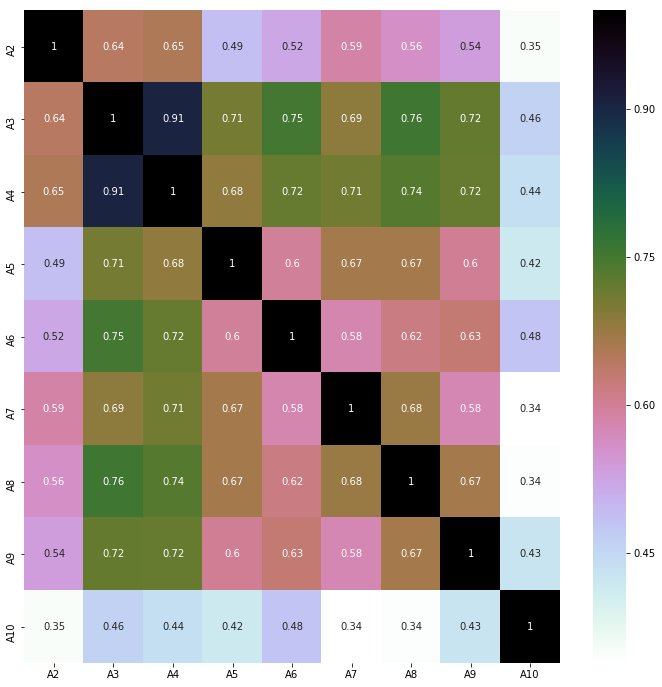

In [114]:
import seaborn as sns
plt.figure(figsize=(12,12)) 
sns.heatmap(bcw_subset.corr(),annot=True,cmap='cubehelix_r') 
plt.show()